## CONTEXT

***This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.***

## CONTENT

***The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.***

*We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage.*

*We have 768 instances and the following 8 attributes:*

- Number of times pregnant (preg)
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
- Diastolic blood pressure in mm Hg (pres)
- Triceps skin fold thickness in mm (skin)
- 2-Hour serum insulin in mu U/ml (insu)
- Body mass index measured as weight in kg/(height in m)^2 (mass)
- Diabetes pedigree function (pedi)
- Age in years (age)

*A particularly interesting attribute used in the study was the Diabetes Pedigree Function, pedi. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. Based on observations in the proceeding section, it is unclear how well this function predicts the onset of diabetes.*

## CONFIGURATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings("ignore")
from matplotlib import rcParams

## LOADING DATASET

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv') 
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## MISSING VALUE IMPUTATION

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values!

## TRAIN - VALIDATION - TEST SPLIT

In [4]:
from sklearn.model_selection import train_test_split
data, test = train_test_split(data,test_size=0.1, random_state=42)

In [5]:
data.shape

(691, 9)

## EDA | PHASE 1

*Exploratory Data Analysis*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 396 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    int64  
 1   Glucose                   691 non-null    int64  
 2   BloodPressure             691 non-null    int64  
 3   SkinThickness             691 non-null    int64  
 4   Insulin                   691 non-null    int64  
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       691 non-null    int64  
 8   Outcome                   691 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,3.800289,120.824891,69.104197,20.422576,80.432706,31.972504,0.473645,32.706223,0.348770
std,3.357112,32.098215,19.126069,15.621919,115.369159,7.884084,0.335638,11.317254,0.476926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,38.000000,32.000000,0.380000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.500000,0.625000,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

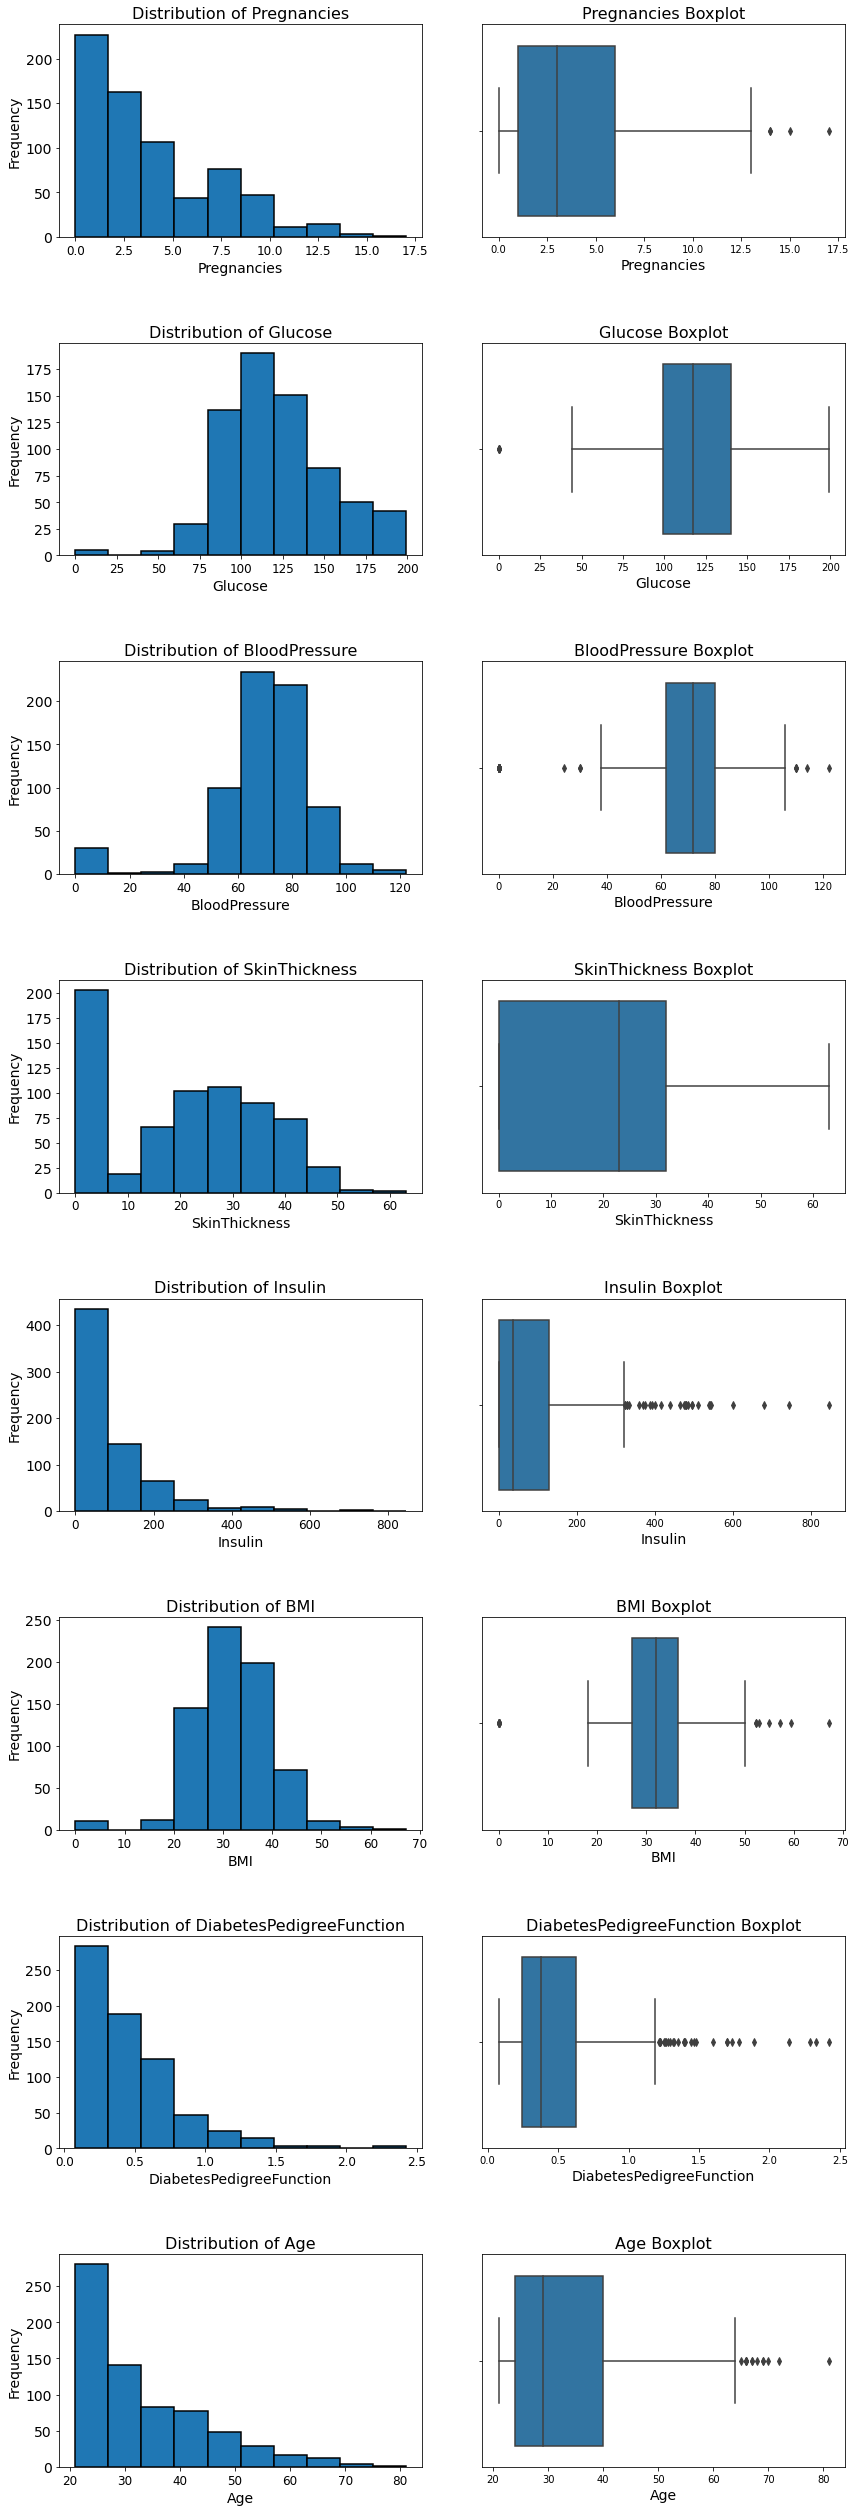

In [9]:
plt.figure(figsize=(12,35))

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    plt.subplot(8,2,(2*i[0])+2);
    sns.boxplot(data[i[1]]);
    plt.title(f"{i[1]} Boxplot",fontsize=16);
    plt.xlabel(f'{i[1]}',fontsize=14)
    plt.tight_layout(h_pad=5, w_pad=5)

### KEY NOTES 

- Number of pregnancies, Insulin level, Diabetes Pedigree function, and Age are skewed with a correlation.
- To remove this skewness, we might need to use Function transformer such as log transform or Power Transformer such as yeo-johnson
- Outlier removal process in columns such as Number of pregnancies, Insulin level, Diabetes Pedigree function, and Age must be done after the function transformations.
- Glucose levels, Blood pressure, Skin thickness, and BMI seem to be Bi-Modal.
- Bi-Modal distributions can be handled by treating one of the distribution as an outlier(lack of integrity in data collection) OR can be handled by Binning.
- Glucose, Blood Pressure, and BMI columns might have outliers. But in skin thickness, there are no outliers. 

## DEALING WITH OUTLIERS 

In [10]:
for col in data.columns[:-1]:
    print(f'Statistical Maximum for {col}: {(data[col].quantile(0.75)+ 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print(f'Statistical Minimum for {col}: {(data[col].quantile(0.25)- 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print()

Statistical Maximum for Pregnancies: 13.5
Statistical Minimum for Pregnancies: -6.5

Statistical Maximum for Glucose: 201.5
Statistical Minimum for Glucose: 37.5

Statistical Maximum for BloodPressure: 107.0
Statistical Minimum for BloodPressure: 35.0

Statistical Maximum for SkinThickness: 80.0
Statistical Minimum for SkinThickness: -48.0

Statistical Maximum for Insulin: 323.75
Statistical Minimum for Insulin: -194.25

Statistical Maximum for BMI: 50.45
Statistical Minimum for BMI: 13.249999999999998

Statistical Maximum for DiabetesPedigreeFunction: 1.195
Statistical Minimum for DiabetesPedigreeFunction: -0.32500000000000007

Statistical Maximum for Age: 64.0
Statistical Minimum for Age: 0.0



In [11]:
for idx, row in data.iterrows():
    if data.loc[idx, 'Pregnancies']> 13:
        data.loc[idx, 'Pregnancies'] = 13
        
        
for idx, row in data.iterrows():
    if data.loc[idx, 'Glucose']> 200:
        data.loc[idx, 'Glucose'] = 200
    
    if data.loc[idx, 'Glucose']< 40:
        data.loc[idx, 'Glucose'] = 40
        
        
for idx, row in data.iterrows():
    if data.loc[idx, 'BloodPressure']> 107:
        data.loc[idx, 'BloodPressure'] = 107
    
    if data.loc[idx, 'BloodPressure']< 35:
        data.loc[idx, 'BloodPressure'] = 35


for idx, row in data.iterrows():
    if data.loc[idx, 'Insulin']> 323:
        data.loc[idx, 'Insulin'] = 323
    

for idx, row in data.iterrows():
    if data.loc[idx, 'BMI']> 50:
        data.loc[idx, 'BMI'] = 50
    
    if data.loc[idx, 'BMI']< 14:
        data.loc[idx, 'BMI'] = 14
        
        
        
for idx, row in data.iterrows():
    if data.loc[idx, 'DiabetesPedigreeFunction']> 1.19:
        data.loc[idx, 'DiabetesPedigreeFunction'] = 1.19
        
        
        
for idx, row in data.iterrows():
    if data.loc[idx, 'Age']> 64:
        data.loc[idx, 'Age'] = 64

## EDA | PHASE 2

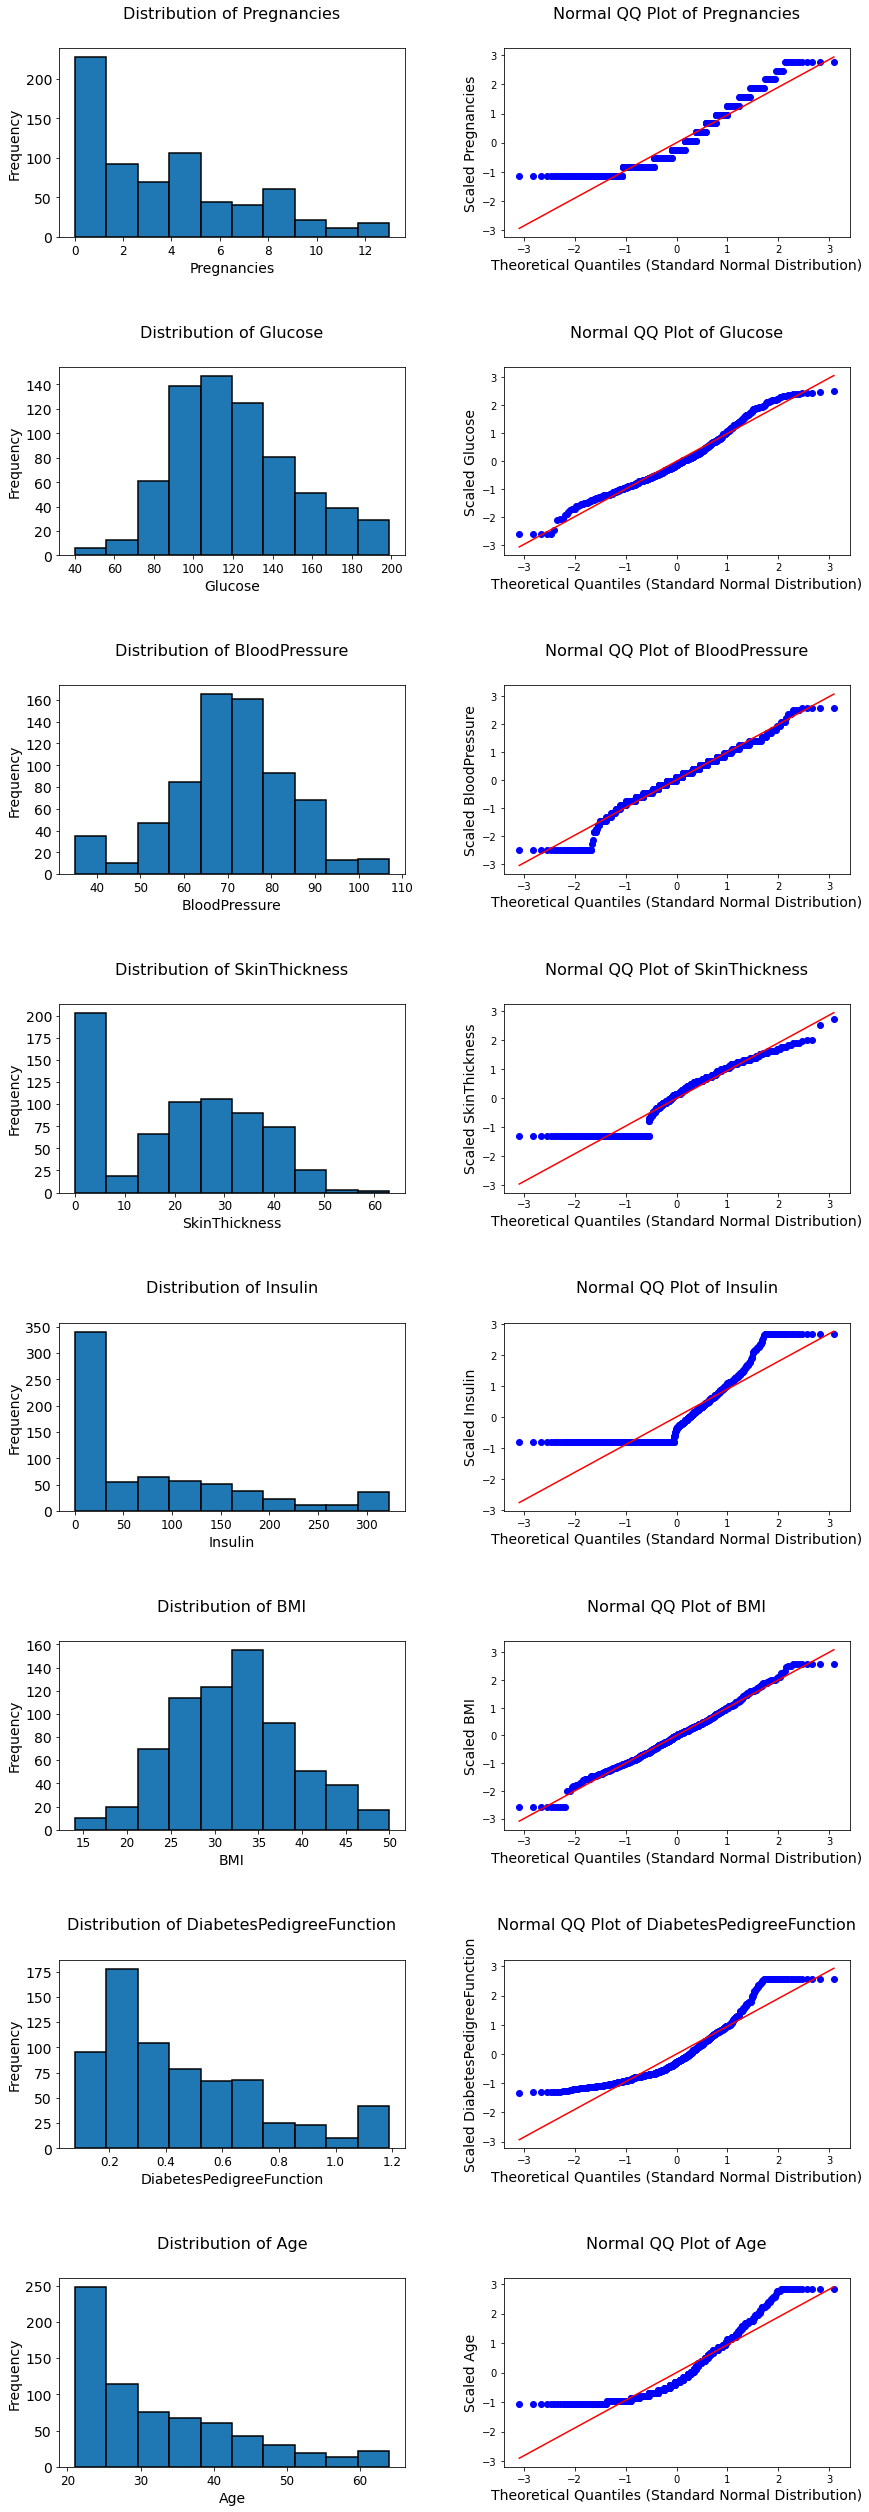

In [12]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tempData = data.copy()
tempData = tempData.drop('Outcome',axis=1)
tempData = sc.fit_transform(tempData)

temp_df = pd.DataFrame(tempData, columns = data.columns[:-1])


plt.figure(figsize=(12,35))

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(temp_df[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);
    
    

### KEY NOTES

- Log transform is used in right-skewed data (Pregnancies, Skin thickness, Insulin levels, Diabetes levels, and Age)
- A Standard Scaler transform would be applied to the complete data.

## FEATURE SELECTION

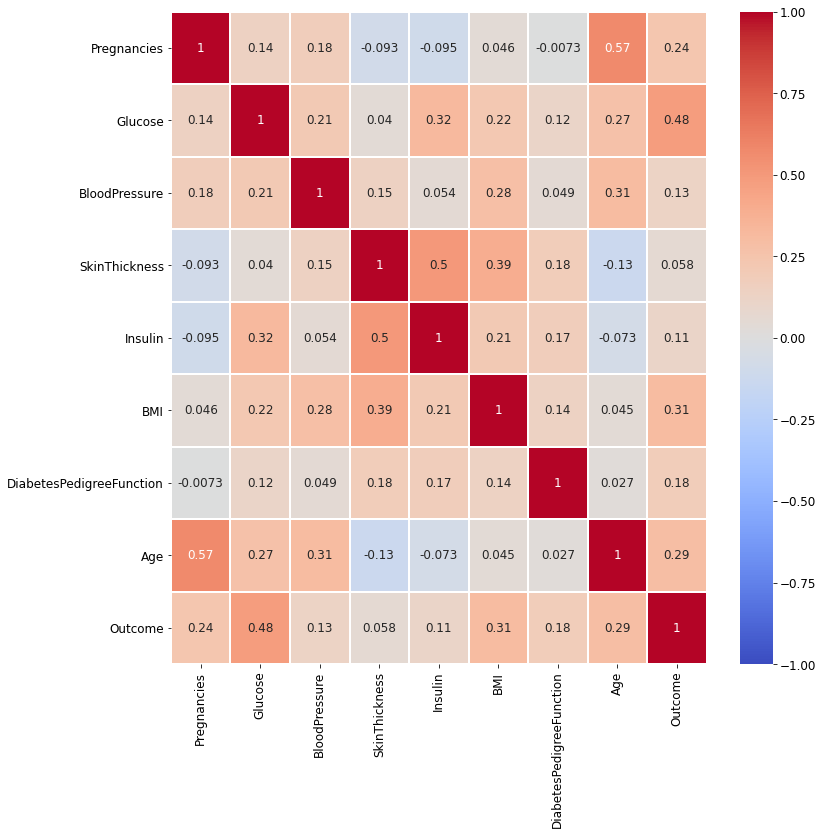

In [13]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, lw=0.2, edgecolor="white");

**It seems that SkinThickness has almost no correlation with the Outcome(Type-2 Diabetes). We need to check its significance**

## FEATURE IMPORTANCE

<Figure size 1008x864 with 0 Axes>

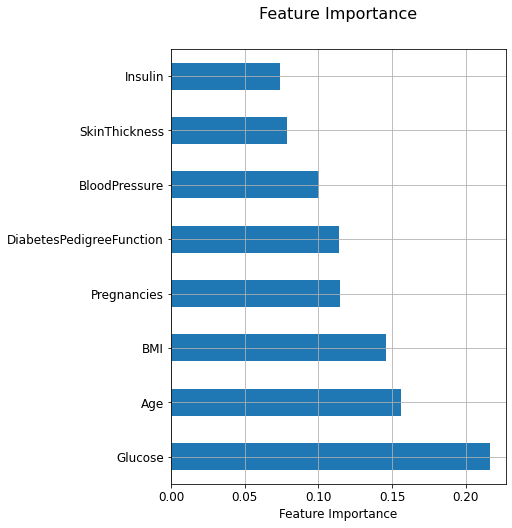

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

fig = plt.figure(figsize=(14,12));
model = ExtraTreesClassifier()
model.fit(data.iloc[:,:-1], data.iloc[:,-1])
fig = plt.figure(figsize=(6,8));
feature_imps = pd.Series(model.feature_importances_, index = data.iloc[:,:-1].columns);
feature_imps.nlargest(8).plot(kind='barh');
plt.grid(True);
plt.title("Feature Importance", pad=30, fontsize=16)
plt.xlabel('Feature Importance');
plt.plot();

**Skin thickness has a comparable importance with other features. Hence we can't remove it**.

## FEATURE TRANSFORMATION

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

X_train, X_validate, y_train, y_validate = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size = 0.1, random_state = 42)

In [16]:
transformer = ColumnTransformer(transformers = [
  ('pt', PowerTransformer(method='yeo-johnson', standardize=True), data.columns[:-1])
], remainder = 'passthrough')

In [17]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pt', PowerTransformer(),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])

In [18]:
X_train = transformer.fit_transform(X_train)
X_validate = transformer.transform(X_validate)

In [19]:
temp_df = pd.DataFrame(X_train, columns = data.columns[:-1])
temp_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.810994,-0.648109,0.061761,-0.232636,0.740630,-0.972177,0.935874,-0.171863
1,0.369586,-0.304323,1.625779,-1.425966,-1.020158,0.787255,-1.110156,0.081944
2,0.067108,1.798213,0.208555,-1.425966,-1.020158,-0.209133,-0.190098,-0.040288
3,0.845071,0.459740,0.662030,0.967556,1.343142,1.938908,-0.791568,1.277045
4,0.624281,-0.138507,0.357548,-1.425966,-1.020158,-0.108742,-0.200002,1.178385


## EDA | PHASE 3

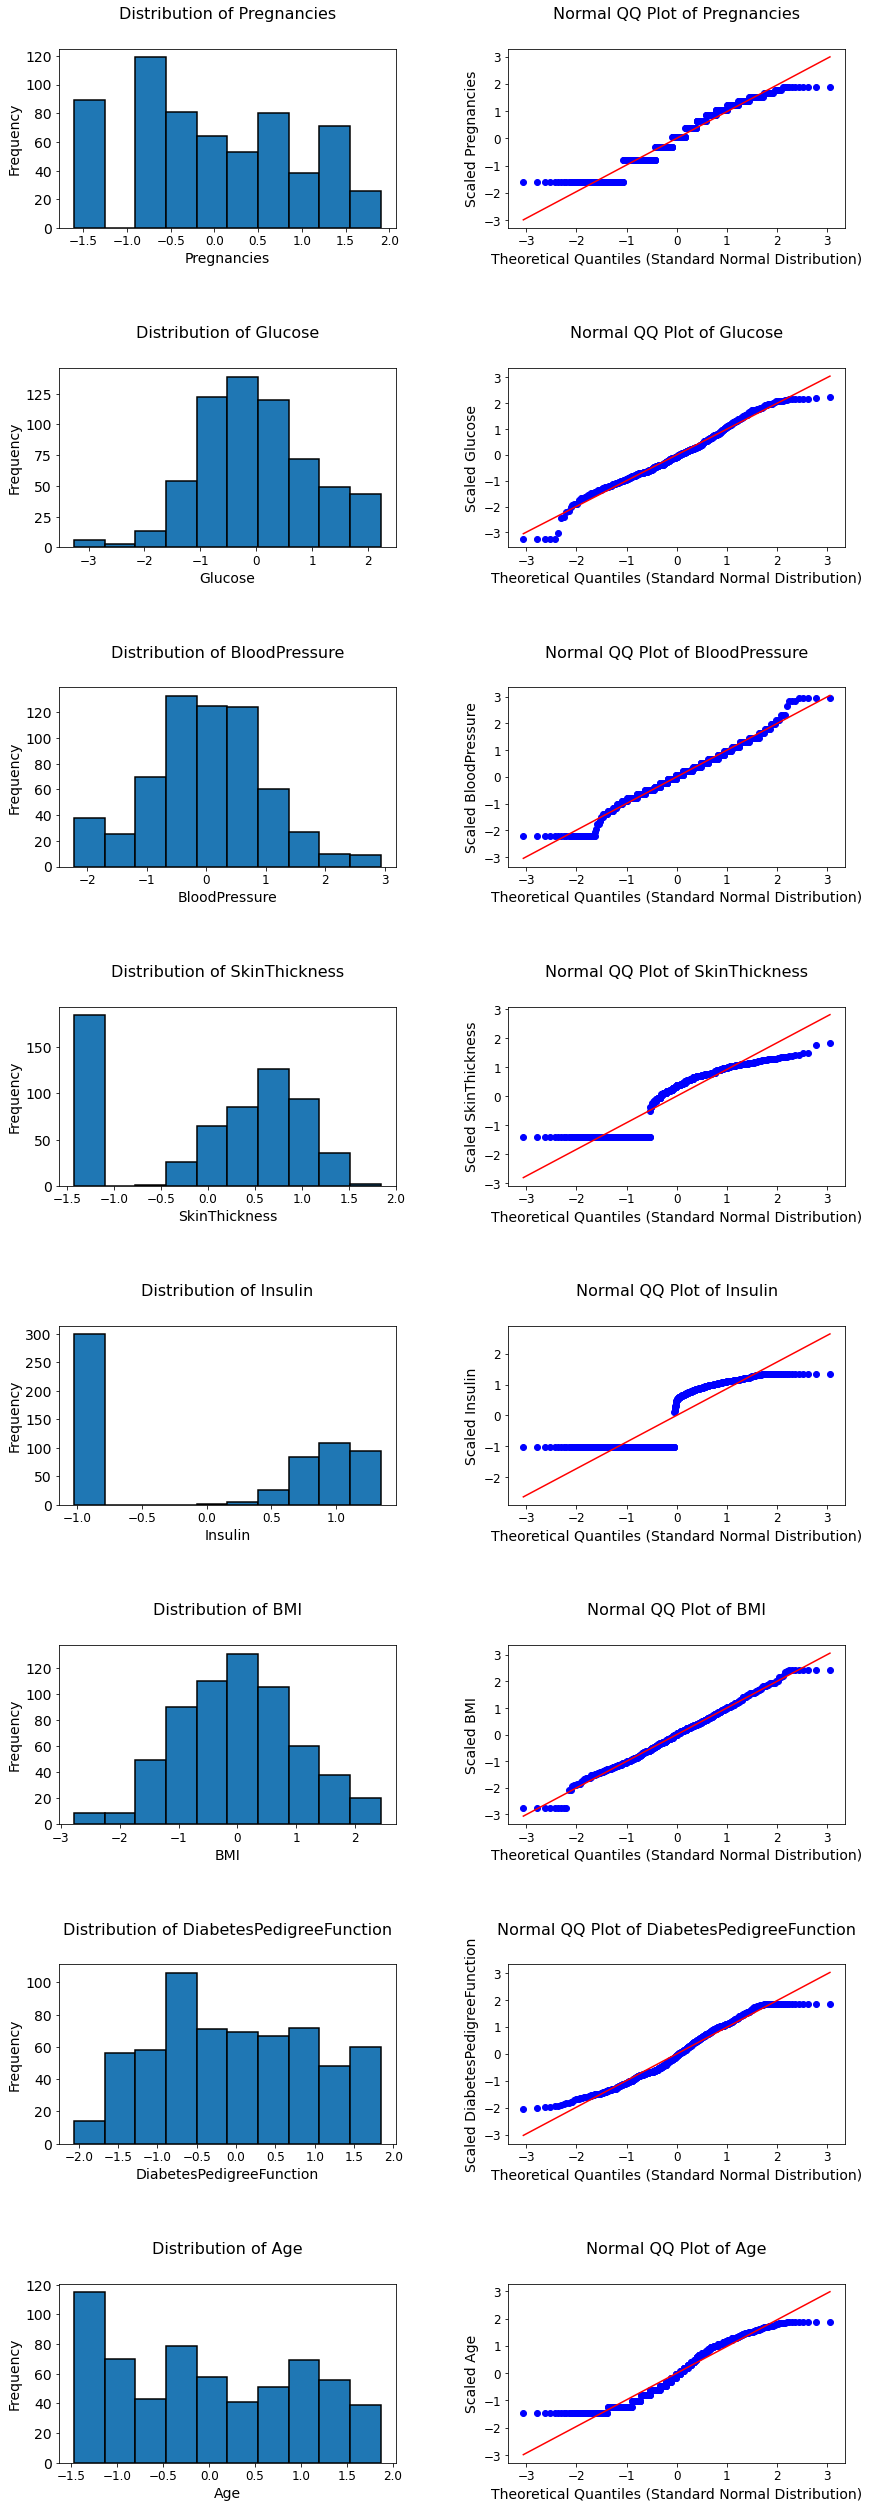

In [20]:
plt.figure(figsize=(12,35))

for i in enumerate(temp_df.columns):
    
    plt.subplot(8,2,(2*i[0])+1);
    temp_df[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(temp_df[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);
    
    

### KEY NOTES

- Normal Quantile Quantile plots of all the variables have significantly improved
- We might need to perform Feature Engineering **(binning procedure)** in columns such as *SkinThickness* and *Insulin*

## DATA UPSAMPLING

Due to imbalanced dataset, model might become biased. Hence, we perform data upsampling using SMOTE algorithm.

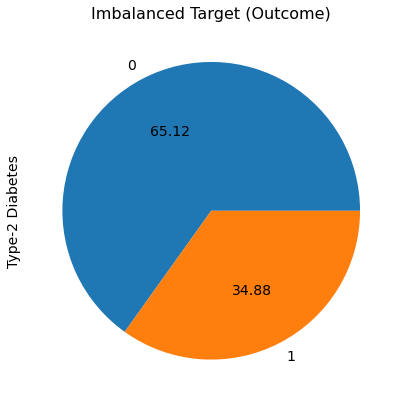

In [21]:
plt.figure(figsize = (7,7))
data['Outcome'].value_counts().plot(kind  = 'pie', autopct = '%.2f', textprops={'fontsize': 14})
plt.tight_layout(pad=5.0);
plt.ylabel('Type-2 Diabetes',fontsize=14);
plt.title('Imbalanced Target (Outcome)',fontsize=16);

In [22]:
from collections import Counter
print(f'Non- Resampled dataset samples per class {Counter(y_train)}')

Non- Resampled dataset samples per class Counter({0: 409, 1: 212})


In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = sm.fit_resample(X_train, y_train)
print(f'Resampled dataset samples per class {Counter(y_train_sampled)}')

Resampled dataset samples per class Counter({0: 409, 1: 409})


In [24]:
sm

SMOTE(random_state=42)

In [25]:
X_train.shape

(621, 8)

## FEATURE EXTRACTION

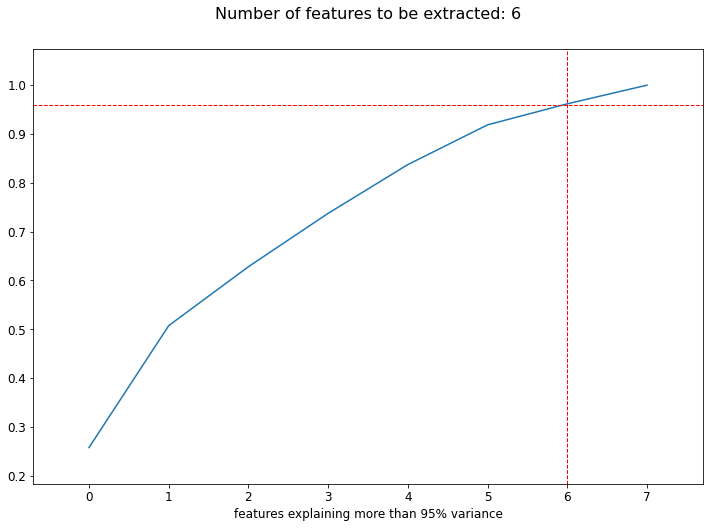

In [26]:
from sklearn.decomposition import PCA

plt.figure(figsize=(12,8))
pca_dummy = PCA(n_components=None, random_state=42)
X_dummy = X_train_sampled.copy()
X_dummy = pca_dummy.fit_transform(X_dummy)
plt.plot(np.cumsum(pca_dummy.explained_variance_ratio_))
plt.axhline(y = 0.96, c='r', linewidth =1, linestyle='--')
plt.axvline(x=6, c='r', linestyle = '--', lw=1)
plt.margins(0.1)
plt.title('Number of features to be extracted: 6', pad=30, fontsize = 16)
plt.xlabel('features explaining more than 95% variance')
plt.show();

In [27]:
pca = PCA(n_components=6, random_state=42)
X_train_sampled = pca.fit_transform(X_train_sampled)
X_validate = pca.transform(X_validate)

In [28]:
pca

PCA(n_components=6, random_state=42)

---
## ML MODELLING

### LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
lr_og=LogisticRegression(random_state=42)
lr_og.fit(X_train_sampled, y_train_sampled)
y_pred = lr_og.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 81.4%
F1-Score: 78.0%


In [30]:
# Weights of all the 6 extracted columns
# for x in enumerate(lr.coef_[0]):
#     print(f'Weight for the extracted column #{x[0]+1} is: {x[1]:.2f}')

In [31]:
# print(f'bias: {lr.intercept_[0]:.2f}')

In [32]:
lr_og

LogisticRegression(random_state=42)

---
### K NEAREST NEIGHBORS CLASSIFIER

In [33]:
print(f'{X_train_sampled.shape[0]**0.5:.1f}')

28.6


In [34]:
from sklearn.neighbors import KNeighborsClassifier

k = range(1,125,2)
vals = [x for x in k]
accuracies = []
fones = []

for val in vals:
    knn=KNeighborsClassifier(val)
    knn.fit(X_train_sampled, y_train_sampled)
    y_pred = knn.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

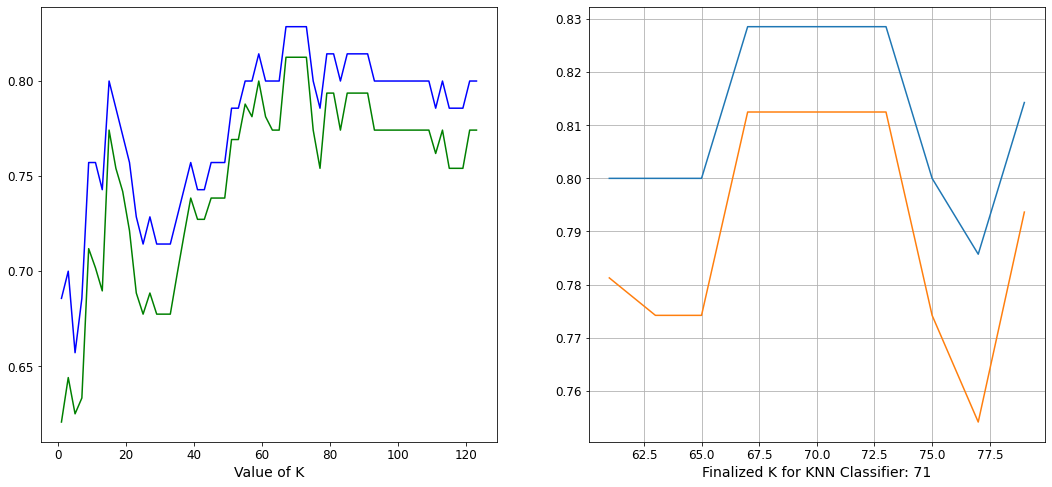

In [35]:
plt.figure(figsize=(18,8))
plt.title("Finalized K for KNN Classifier: 71", fontsize=18, pad=30)

plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
# plt.axhline(y = 92.86, c='r', linewidth =1, linestyle='--')
# plt.axvline(x=19, c='r', linestyle = '--', lw=1)
#plt.title("Finalized K for Bagging Classifier (base estimator: KNN Classifier): 19", fontsize=18, pad=30)
plt.xlabel("Value of K",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[30:40])
plt.xlabel("Finalized K for KNN Classifier: 71",fontsize=14);
plt.grid(True)

In [36]:
knn_og=KNeighborsClassifier(n_neighbors=71)
knn_og.fit(X_train_sampled, y_train_sampled)
y_pred = knn_og.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 82.9%
F1-Score: 81.2%


In [37]:
knn_og

KNeighborsClassifier(n_neighbors=71)

---
### SUPPORT VECTOR MACHINE CLASSIFIER

In [38]:
from sklearn.svm import SVC

svc = SVC(C=0.05, kernel='rbf', random_state=42)
svc.fit(X_train_sampled, y_train_sampled)
y_pred = svc.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 82.9%
F1-Score: 81.2%


---
### BAGGING FOR LOGISTIC REGRESSION

In [39]:
from sklearn.ensemble import BaggingClassifier

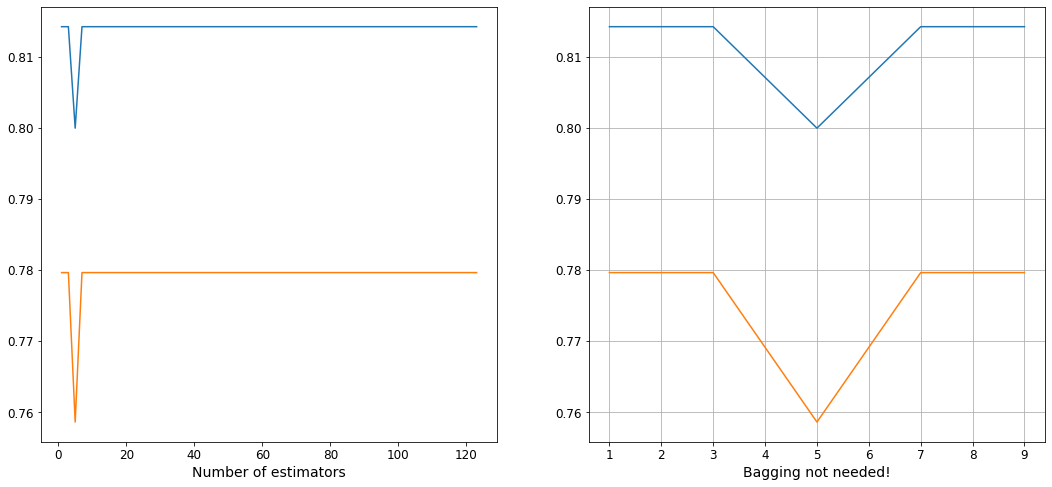

In [40]:
n = range(1,100)
vals = [x for x in k]
accuracies = []
fones = []
for val in vals:
    lr = lr=LogisticRegression(random_state=42)
    bagging_lr = BaggingClassifier(base_estimator=lr, random_state=42, n_estimators=val)
    bagging_lr.fit(X_train_sampled, y_train_sampled)
    y_pred = bagging_lr.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[:5])
plt.xlabel("Bagging not needed!",fontsize=14);
plt.grid(True)


---
### BAGGING FOR K NEIGHBORS CLASSIFIER

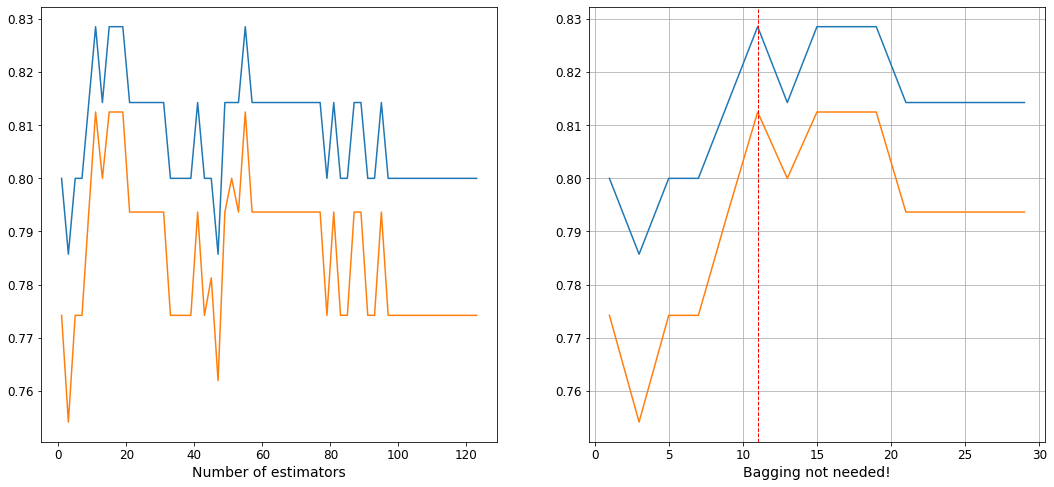

In [41]:
n = range(1,100)
vals = [x for x in k]
accuracies = []
fones = []
for val in vals:
    knn=KNeighborsClassifier(n_neighbors=71)
    bagging_knn = BaggingClassifier(base_estimator=knn, random_state=42, n_estimators=val)
    bagging_knn.fit(X_train_sampled, y_train_sampled)
    y_pred = bagging_knn.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[:15])
plt.xlabel("Bagging not needed!",fontsize=14);
plt.axvline(x=11, c='r', linestyle = '--', lw=1)
plt.grid(True)


---
### BAGGING FOR SUPPORT VECTOR MACHINES

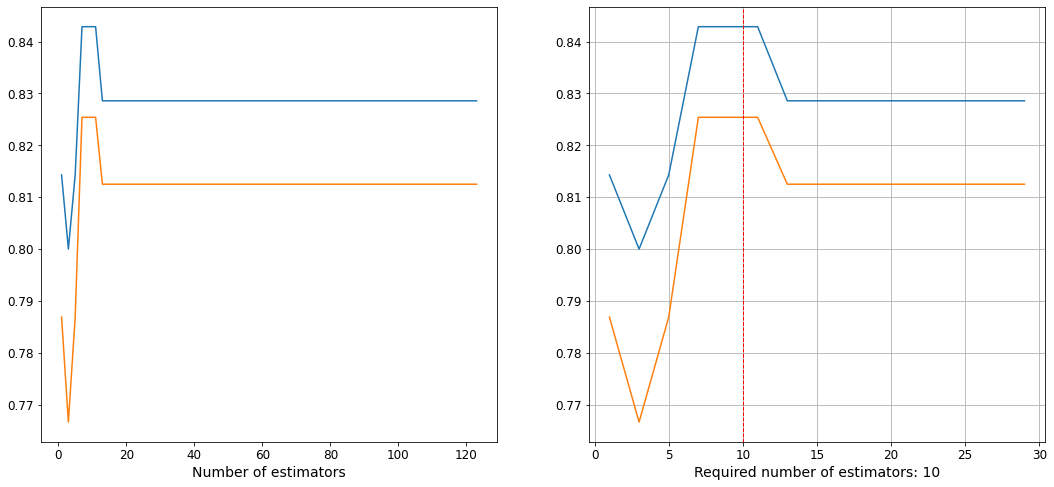

In [42]:
n = range(1,100)
vals = [x for x in k]
accuracies = []
fones = []
for val in vals:
    svc = SVC(C=0.05, kernel='rbf', random_state=42)
    bagging_svc = BaggingClassifier(base_estimator=svc, random_state=42, n_estimators=val)
    bagging_svc.fit(X_train_sampled, y_train_sampled)
    y_pred = bagging_svc.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[:15])
plt.xlabel("Required number of estimators: 10",fontsize=14);
plt.axvline(x=10, c='r', linestyle = '--', lw=1)
plt.grid(True)


In [43]:
svc = SVC(C=0.05, kernel='rbf', random_state=42)
bagging_svc = BaggingClassifier(base_estimator=svc, random_state=42, n_estimators=10)
bagging_svc.fit(X_train_sampled, y_train_sampled)
y_pred = bagging_svc.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 84.3%
F1-Score: 82.5%


In [44]:
bagging_svc

BaggingClassifier(base_estimator=SVC(C=0.05, random_state=42), random_state=42)

---
### ADAM GRADIENT BOOSTING

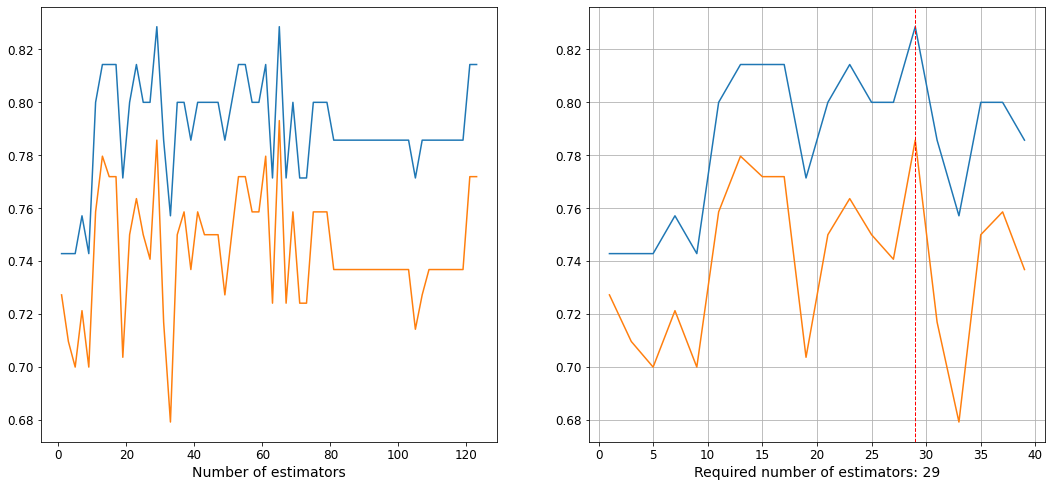

In [45]:
from sklearn.ensemble import AdaBoostClassifier

n = range(1,100,1)
vals = [x for x in k]
accuracies = []
fones = []
for val in vals:
    ada = AdaBoostClassifier(n_estimators=val, learning_rate=1.2, random_state=42)
    ada.fit(X_train_sampled, y_train_sampled)
    y_pred = ada.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[:20])
plt.xlabel("Required number of estimators: 29",fontsize=14);
plt.axvline(x=29, c='r', linestyle = '--', lw=1)
plt.grid(True)



In [46]:
ada = AdaBoostClassifier(n_estimators=29, learning_rate=1.2, random_state=42)
ada.fit(X_train_sampled, y_train_sampled)
y_pred = ada.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 82.9%
F1-Score: 78.6%


In [47]:
ada

AdaBoostClassifier(learning_rate=1.2, n_estimators=29, random_state=42)

---
### RANDOM FOREST CLASSIFIER

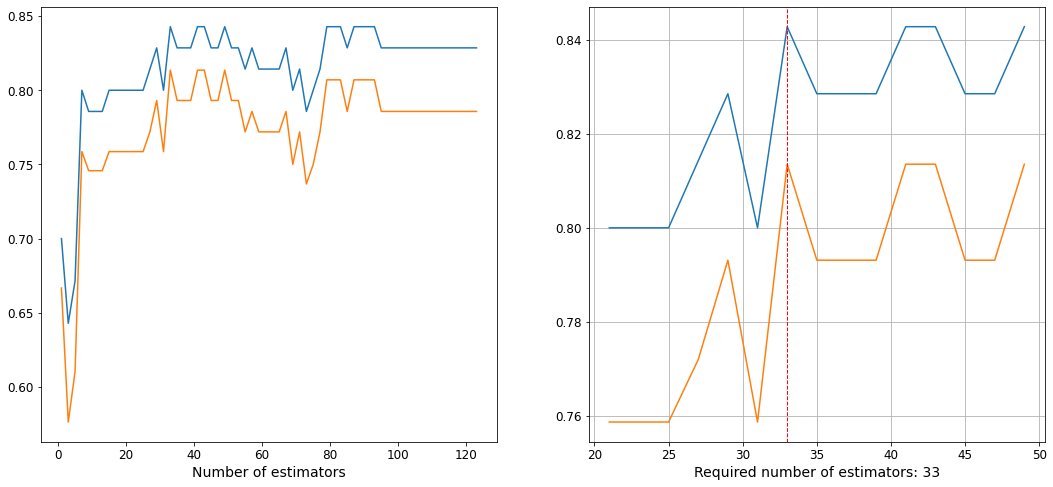

In [48]:
from sklearn.ensemble import RandomForestClassifier

n = range(1,100,1)
vals = [x for x in k]
accuracies = []
fones = []
for val in vals:
    rfc = RandomForestClassifier(n_estimators=val, random_state=42)
    rfc.fit(X_train_sampled, y_train_sampled)
    y_pred = rfc.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[10:25])
plt.xlabel("Required number of estimators: 33",fontsize=14);
plt.axvline(x=33, c='r', linestyle = '--', lw=1)
plt.grid(True)



In [49]:
rfc = RandomForestClassifier(n_estimators=33, random_state=42)
rfc.fit(X_train_sampled, y_train_sampled)
y_pred = rfc.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 84.3%
F1-Score: 81.4%


In [50]:
rfc

RandomForestClassifier(n_estimators=33, random_state=42)

---
### EXTRATREES CLASSIFIER

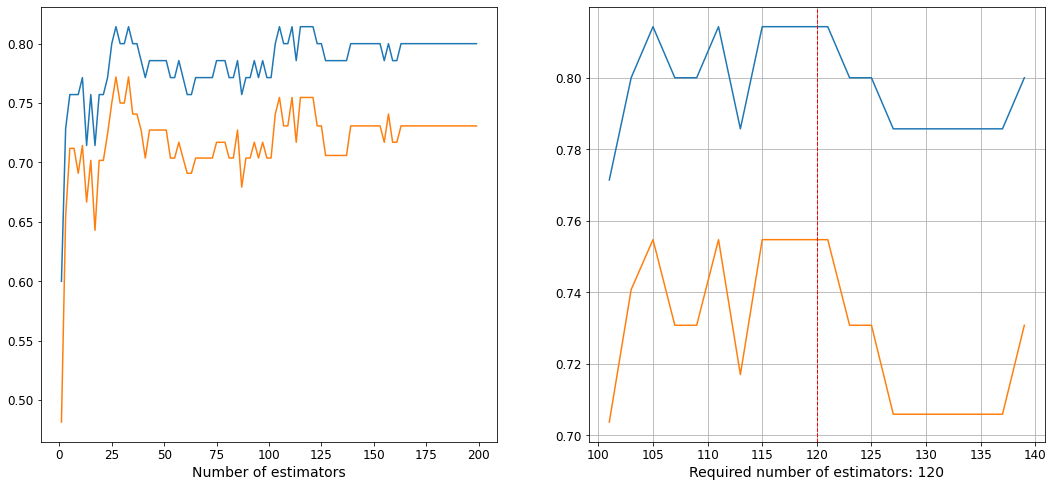

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

n = range(1,200,2)
vals = [x for x in n]
accuracies = []
fones = []
for val in vals:
    etc = ExtraTreesClassifier(n_estimators=val, random_state=42)
    etc.fit(X_train_sampled, y_train_sampled)
    y_pred = etc.predict(X_validate)
    accuracies.append(accuracy_score(y_validate, y_pred))
    fones.append(f1_score(y_validate, y_pred))

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'accuracies': accuracies, 'fones':fones})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.plot(temp_df, lw = 1.5, linestyle="-")
plt.xlabel("Number of estimators",fontsize=14);
plt.plot();

plt.subplot(1,2,2)
plt.plot(temp_df[50:70])
plt.xlabel("Required number of estimators: 120",fontsize=14);
plt.axvline(x=120, c='r', linestyle = '--', lw=1)
plt.grid(True)

In [52]:
etc_og = ExtraTreesClassifier(n_estimators=120, random_state=42)
etc_og.fit(X_train_sampled, y_train_sampled)
y_pred = etc_og.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 81.4%
F1-Score: 75.5%


In [53]:
etc_og

ExtraTreesClassifier(n_estimators=120, random_state=42)

---
### VOTING CLASSIFIER

In [54]:
from sklearn.ensemble import VotingClassifier

rfc_vc = RandomForestClassifier(n_estimators=33, random_state=42)

svc = SVC(C=0.05, kernel='rbf', random_state=42)
bagging_svc_vc = BaggingClassifier(base_estimator=svc, random_state=42, n_estimators=10)

knn_vc =KNeighborsClassifier(n_neighbors=71)


vote = VotingClassifier(estimators = [
    ('bagging_svc_vc', bagging_svc_vc),
    ('rfc_vc', rfc_vc),
    ('knn_vc', knn_vc),
], voting='hard', weights=[0.4,0.3,0.3])


vote.fit(X_train_sampled, y_train_sampled)
y_pred = vote.predict(X_validate)
print(f'Accuracy: {accuracy_score(y_validate, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_validate, y_pred)*100:.1f}%')

Accuracy: 85.7%
F1-Score: 84.4%


In [55]:
vote

VotingClassifier(estimators=[('bagging_svc_vc',
                              BaggingClassifier(base_estimator=SVC(C=0.05,
                                                                   random_state=42),
                                                random_state=42)),
                             ('rfc_vc',
                              RandomForestClassifier(n_estimators=33,
                                                     random_state=42)),
                             ('knn_vc', KNeighborsClassifier(n_neighbors=71))],
                 weights=[0.4, 0.3, 0.3])

### KEY NOTES

- The best performer on the validation data was the voting classifier which was an ensemble of BaggingSVM, Random Forest, and KNN.
- We now check the performance of these algorithms on the test data.

In [56]:
def highlight_cols(x):
      
    # copy df to new - original data is not changed
    df = x.copy()
      
    # select all values to yellow color
    #df.loc['AdaBoost', 'Test set accuracy'] = 'background-color: yellow'
    df.loc['Voting Classifier', 'Validation set accuracy'] = 'background-color: cyan'
    
    #df.loc['AdaBoost', 'Test set f1-score'] = 'background-color: cyan'
    df.loc['Voting Classifier', 'Validation set f1-score'] = 'background-color: cyan'
      
    
    return df 



In [57]:
validation_df = pd.DataFrame({"Algorithm": ['Voting Classifier', 'BaggingSVC', 'Random Forest', 'KNN', 'AdaBoost', 'Extratrees', 'Logistic Regression'], "Validation set accuracy": ['85.7%', '84.3%', '84.3%', '82.9%', '82.9%', '81.4%', '81.4%'], "Validation set f1-score": ['84.4%', '82.5%', '81.4%', '81.2%', '78.6%', '75.5&', '78.0%']})
validation_df.set_index('Algorithm', inplace=True)
display(validation_df.style.apply(highlight_cols, axis = None))

,Validation set accuracy,Validation set f1-score
Algorithm,,
Voting Classifier,85.7%,84.4%
BaggingSVC,84.3%,82.5%
Random Forest,84.3%,81.4%
KNN,82.9%,81.2%
AdaBoost,82.9%,78.6%
Extratrees,81.4%,75.5&
Logistic Regression,81.4%,78.0%


In [58]:
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

## SAVING ML MODELS

In [59]:
import joblib

filename = 'transformer.sav'
joblib.dump(transformer, filename)

filename = 'pca.sav'
joblib.dump(pca, filename)

filename = 'lr.sav'
joblib.dump(lr_og, filename)

filename = 'knn.sav'
joblib.dump(knn_og, filename)

filename = 'bagging_svc.sav'
joblib.dump(bagging_svc, filename)

filename = 'rfc.sav'
joblib.dump(rfc, filename)

filename = 'ada.sav'
joblib.dump(ada, filename)

filename = 'vote.sav'
joblib.dump(vote, filename)

filename = 'etc.sav'
joblib.dump(etc_og, filename)


['etc.sav']

## ML PIPELINE

In [60]:
def helper(df):
    
    for idx, row in df.iterrows():
        if df.loc[idx, 'Pregnancies']> 13:
            df.loc[idx, 'Pregnancies'] = 13


    for idx, row in df.iterrows():
        if df.loc[idx, 'Glucose']> 200:
            df.loc[idx, 'Glucose'] = 200

        if df.loc[idx, 'Glucose']< 40:
            df.loc[idx, 'Glucose'] = 40


    for idx, row in df.iterrows():
        if df.loc[idx, 'BloodPressure']> 107:
            df.loc[idx, 'BloodPressure'] = 107

        if df.loc[idx, 'BloodPressure']< 35:
            df.loc[idx, 'BloodPressure'] = 35


    for idx, row in df.iterrows():
        if df.loc[idx, 'Insulin']> 323:
            df.loc[idx, 'Insulin'] = 323


    for idx, row in df.iterrows():
        if df.loc[idx, 'BMI']> 50:
            df.loc[idx, 'BMI'] = 50

        if df.loc[idx, 'BMI']< 14:
            df.loc[idx, 'BMI'] = 14
        
        
    for idx, row in df.iterrows():
        if df.loc[idx, 'DiabetesPedigreeFunction']> 1.19:
            df.loc[idx, 'DiabetesPedigreeFunction'] = 1.2
        
    for idx, row in df.iterrows():
        if df.loc[idx, 'Age']> 64:
            df.loc[idx, 'Age'] = 64
            
    
    return df


    

In [61]:
def data_pipe(df=None):
    
    if df is None:
        # We need to take inputs
        Pregnancies = int(input("Number of Pregnancies: "))
        Glucose = int(input("Glucose Level: "))
        BloodPressure = int(input("Blood Pressure: "))
        SkinThickness = int(input("Skin Thickness: "))
        Insulin = int(input("Insulin Level: "))
        BMI = float(input("BMI: "))
        DiabetesPedigreeFunction = float(input("Diabetes Pedigree Function value: "))
        Age = int(input("Age: "))
        
        df = pd.DataFrame({"Pregnancies":[Pregnancies], "Glucose":[Glucose], "BloodPressure":[BloodPressure], "SkinThickness":[SkinThickness], "Insulin":[Insulin], "BMI":[BMI], "DiabetesPedigreeFunction":[DiabetesPedigreeFunction], "Age": [Age]})
        return df
    
    elif type(df) == pd.DataFrame:
        # We have a DataFrame as an input
        df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
        return df
    
    
    

In [62]:
def pipeline(df=None, algorithm= 'vote'):
    
    transformer = joblib.load('transformer.sav')
    pca = joblib.load('pca.sav')
    lr = joblib.load('lr.sav')
    knn = joblib.load('knn.sav')
    ada = joblib.load('ada.sav')
    bagging_svc = joblib.load('bagging_svc.sav')
    rfc = joblib.load('rfc.sav')
    vote = joblib.load('vote.sav')
    etc = joblib.load('etc.sav')
    
    
    df = data_pipe(df)
    df = helper(df)
    df = transformer.transform(df)
    piped_data = pca.transform(df)
    
    
    if algorithm=='vote':
        return(vote.predict(piped_data))
    elif algorithm=='lr':
        return(lr.predict(piped_data))
    elif algorithm=='knn':
        return(knn.predict(piped_data))
    elif algorithm=='ada':
        return(ada.predict(piped_data))
    elif algorithm=='rfc':
        return(rfc.predict(piped_data))
    elif algorithm=='bagging_svc':
        return(bagging_svc.predict(piped_data))
    elif algorithm=='etc':
        return(etc.predict(piped_data))

In [63]:
y_pred = pipeline(X_test,algorithm = 'lr')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 64.9%
F1-Score: 59.7%


In [64]:
y_pred = pipeline(X_test,algorithm = 'ada')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 72.7%
F1-Score: 66.7%


In [65]:
y_pred = pipeline(X_test,algorithm = 'knn')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 66.2%
F1-Score: 62.9%


In [66]:
y_pred = pipeline(X_test,algorithm = 'rfc')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 70.1%
F1-Score: 61.0%


In [67]:
y_pred = pipeline(X_test,algorithm = 'bagging_svc')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 62.3%
F1-Score: 56.7%


In [68]:
y_pred = pipeline(X_test,algorithm = 'vote')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 63.6%
F1-Score: 57.6%


In [69]:
y_pred = pipeline(X_test,algorithm = 'etc')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')
print(f'F1-Score: {f1_score(y_test, y_pred)*100:.1f}%')

Accuracy: 66.2%
F1-Score: 55.2%


In [70]:
def highlight_cols(x):
      
    # copy df to new - original data is not changed
    df = x.copy()
      
    # select all values to yellow color
    df.loc['AdaBoost', 'Test set accuracy'] = 'background-color: yellow'
    df.loc['Voting Classifier', 'Validation set accuracy'] = 'background-color: yellow'
    
    df.loc['AdaBoost', 'Test set f1-score'] = 'background-color: cyan'
    df.loc['Voting Classifier', 'Validation set f1-score'] = 'background-color: cyan'
      
    
    return df 



In [71]:
results_df = pd.DataFrame({"Algorithm": ['Voting Classifier', 'BaggingSVC', 'Random Forest', 'KNN',  'AdaBoost', 'Extratrees', 'Logistic Regression'], "Validation set accuracy": ['85.7%', '84.3%', '84.3%', '82.9%', '82.9%','81.4%', '81.4%'], "Test set accuracy": ['63.6%', '62.3%','70.1%', '66.2%', '72.7%', '66.2%', '64.9%'], "Validation set f1-score": ['84.4%', '82.5%', '81.4%', '81.2%', '78.6%','75.5%', '78.0%'], "Test set f1-score":['57.6%', '56.7%', '61.0%', '62.9%', '55.2%','55.2%', '59.7%']})
results_df.set_index('Algorithm', inplace=True)
display(results_df.style.apply(highlight_cols, axis = None))

,Validation set accuracy,Test set accuracy,Validation set f1-score,Test set f1-score
Algorithm,,,,
Voting Classifier,85.7%,63.6%,84.4%,57.6%
BaggingSVC,84.3%,62.3%,82.5%,56.7%
Random Forest,84.3%,70.1%,81.4%,61.0%
KNN,82.9%,66.2%,81.2%,62.9%
AdaBoost,82.9%,72.7%,78.6%,55.2%
Extratrees,81.4%,66.2%,75.5%,55.2%
Logistic Regression,81.4%,64.9%,78.0%,59.7%


> Drop in accuracy: **`13%`**